Reconhecimento de Padrões

Lista 2: Regressão Polinomial

# Imports

In [560]:
import pandas as pd
import numpy as np
from numpy import sqrt

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [561]:
data_boston = pd.read_csv("content/boston.csv", header=None)
print(data_boston.shape)
data_boston.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [562]:
data_gauss = pd.read_csv("content/gauss.csv")
print(data_gauss.shape)
data_gauss.head()

(250, 2)


,x,y
0,1.0,97.58776
1,2.0,97.76344
2,3.0,96.56705
3,4.0,92.52037
4,5.0,91.15097


# Models

In [563]:
class OrdinaryLeastSquares:
    def __init__(self):
        self.w = []
        self.mse = None
        self.target_max = None
        self.target_min = None
        self.unormalized_rmse = None

    def fit(self, x, y, target_max=None, target_min=None, regularization=None):
        x = x.copy()
        x.insert(0, "x0", 1)
        x = x.values
        y = y.values

        squares = x.T @ x

        if regularization:
            squares += regularization * np.eye(x.shape[1])

        squares_inv = np.linalg.pinv(squares)
        self.w = squares_inv @ x.T @ y
        train_prediction = x @ self.w

        self.mse = np.mean((y - train_prediction) ** 2)
        if target_max and target_min:
            train_prediction_un = train_prediction * \
                (target_max - target_min) + target_min
            y_un = y * (target_max - target_min) + target_min
            self.unormalized_rmse = sqrt(
                np.mean((y_un - train_prediction_un) ** 2))
        return self.w

    def predict(self, x):
        x = x.copy()
        x.insert(0, "x0", 1)
        x = x.values

        return x @ self.w

# Q1

## a) Train Test Split & Normalize data

In [564]:
X_train, X_test, y_train, y_test = train_test_split(
    data_boston.iloc[:, 0:-1], data_boston.iloc[:, -1], test_size=0.2, random_state=101
)

In [565]:
x_max = X_train.max()
x_min = X_train.min()

y_max = y_train.max()
y_min = y_train.min()

In [566]:
X_train_norm = (X_train - x_min) / (x_max - x_min)
X_test_norm = (X_test - x_min) / (x_max - x_min)

y_train_norm = (y_train - y_min) / (y_max - y_min)
y_test_norm = (y_test - y_min) / (y_max - y_min)

## b) Train model for each polynomial up to 11

In [567]:
polynom_train = []
polynom_test = []

polynomial_train_data = pd.DataFrame()
polynomial_test_data = pd.DataFrame()

for i in range(11):
    polynomial_train_data = pd.concat(
        [polynomial_train_data, X_train_norm ** (i + 1)], axis=1)
    polynomial_test_data = pd.concat(
        [polynomial_test_data, X_test_norm ** (i + 1)], axis=1)
    polynom_train.append(polynomial_train_data)
    polynom_test.append(polynomial_test_data)

In [568]:
OLS = OrdinaryLeastSquares()
train_data = pd.DataFrame()
test_data = pd.DataFrame()
rmse_train = []
rmse_test = []


for train, test in zip(polynom_train, polynom_test):

    OLS.fit(train, y_train_norm, target_max=y_max, target_min=y_min)

    rmse_train.append(OLS.unormalized_rmse)

    y_pred_norm = OLS.predict(test)

    y_pred = y_pred_norm * (y_max - y_min) + y_min

    rmse_test.append(sqrt(np.mean((y_test - y_pred) ** 2)))

## c) RMSE test & train

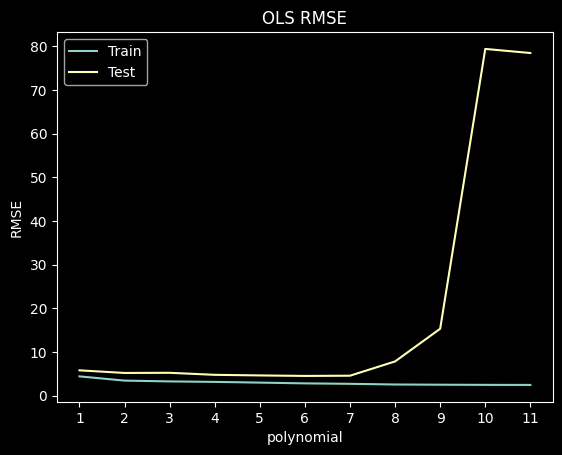

In [569]:
x_axis = range(1, len(rmse_train) + 1)
plt.plot(x_axis, rmse_train, label="Train")
plt.plot(x_axis, rmse_test, label='Test')
plt.xlabel('polynomial')
plt.xticks(x_axis)
plt.ylabel('RMSE')
plt.title("OLS RMSE")
plt.legend()
plt.show()

## d) Redo using regularization L2 == 0.01

In [570]:
OLS = OrdinaryLeastSquares()
train_data = pd.DataFrame()
test_data = pd.DataFrame()
rmse_train = []
rmse_test = []

for train, test in zip(polynom_train, polynom_test):

    OLS.fit(train, y_train_norm, target_max=y_max,
            target_min=y_min, regularization=0.01)
    rmse_train.append(OLS.unormalized_rmse)
    y_pred_norm = OLS.predict(test)
    y_pred = y_pred_norm * (y_max - y_min) + y_min
    rmse_test.append(sqrt(np.mean((y_test - y_pred) ** 2)))

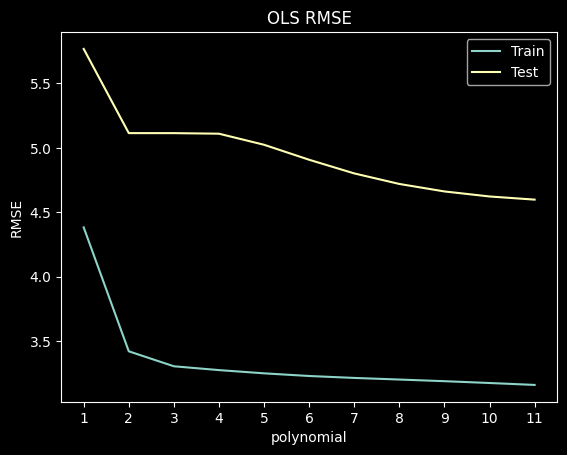

In [571]:
x_axis = range(1, len(rmse_train) + 1)
plt.plot(x_axis, rmse_train, label="Train")
plt.plot(x_axis, rmse_test, label='Test')
plt.xlabel('polynomial')
plt.xticks(x_axis)
plt.ylabel('RMSE')
plt.title("OLS RMSE")
plt.legend()
plt.show()

# Q2

## a) Train OLS with gauss dataset normalized with each polynomial up to 20.

In [572]:
X_gauss = data_gauss.iloc[:, 0:-1]
y_gauss = data_gauss.iloc[:, -1]

x_max = X_gauss.max()
x_min = X_gauss.min()
y_max = y_gauss.max()
y_min = y_gauss.min()

In [573]:
X_gauss_norm = (X_gauss - x_min) / (x_max - x_min)
y_gauss_norm = (y_gauss - y_min) / (y_max - y_min)

In [574]:
polynom_train = []
polynomial_data = pd.DataFrame()

for i in range(20):
    polynomial_data = pd.concat(
        [polynomial_data, X_gauss_norm ** (i + 1)], axis=1)

    polynom_train.append(polynomial_data)

In [575]:
OLS = OrdinaryLeastSquares()
rmse_train = []
predictions_list = []

for train in polynom_train:
    OLS.fit(train, y_gauss_norm, target_max=y_max, target_min=y_min)
    rmse_train.append(OLS.unormalized_rmse)
    y_pred_norm = OLS.predict(train)
    y_pred = y_pred_norm * (y_max - y_min) + y_min
    predictions_list.append(y_pred)

## b) Dispersion Graph & Regression Curve for each polynomial

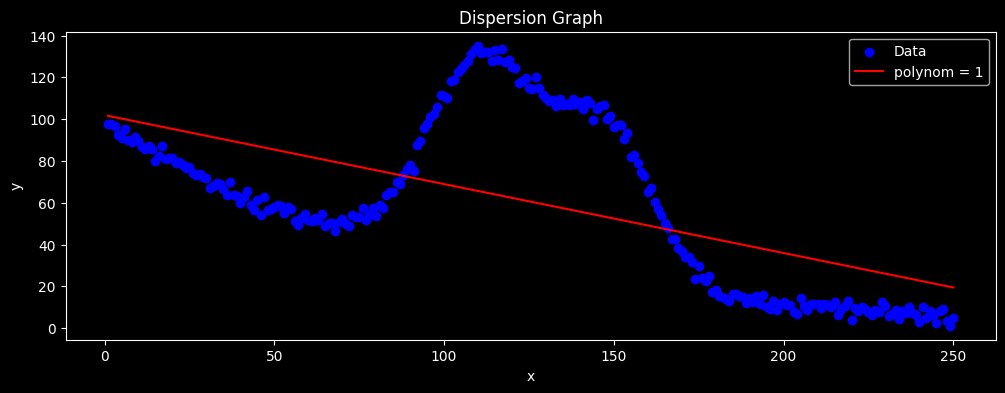

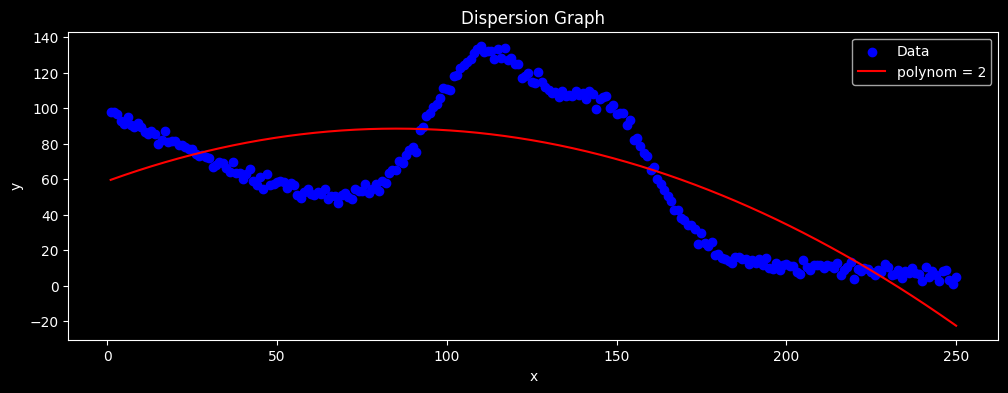

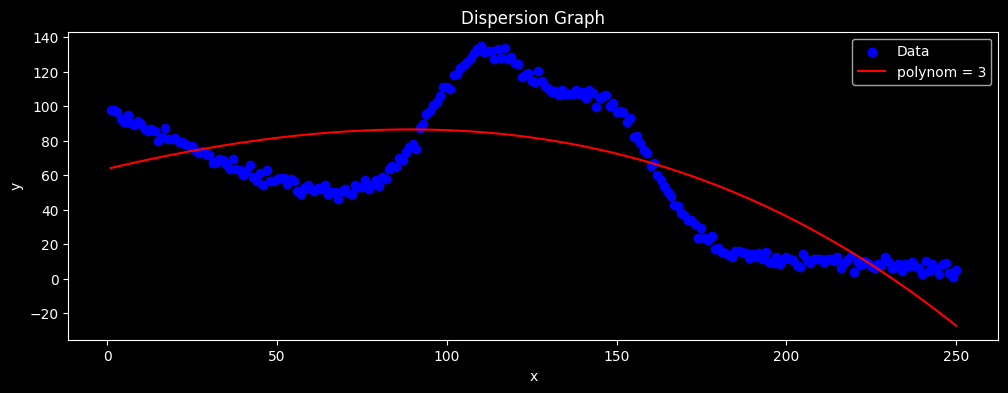

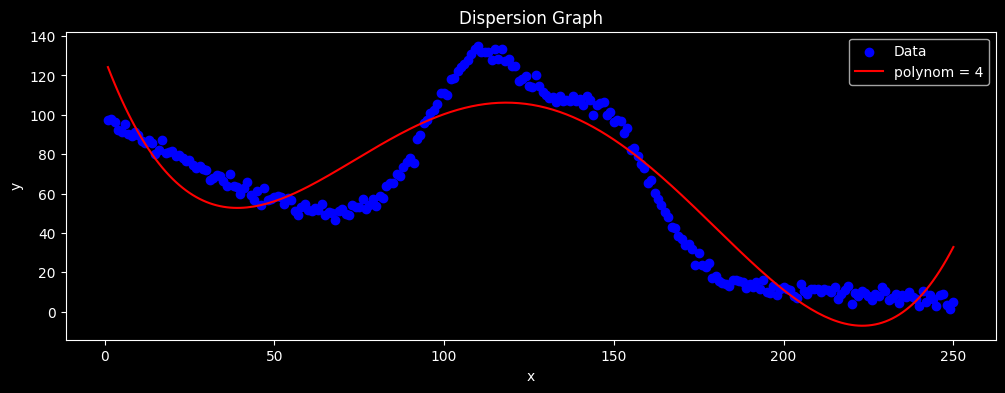

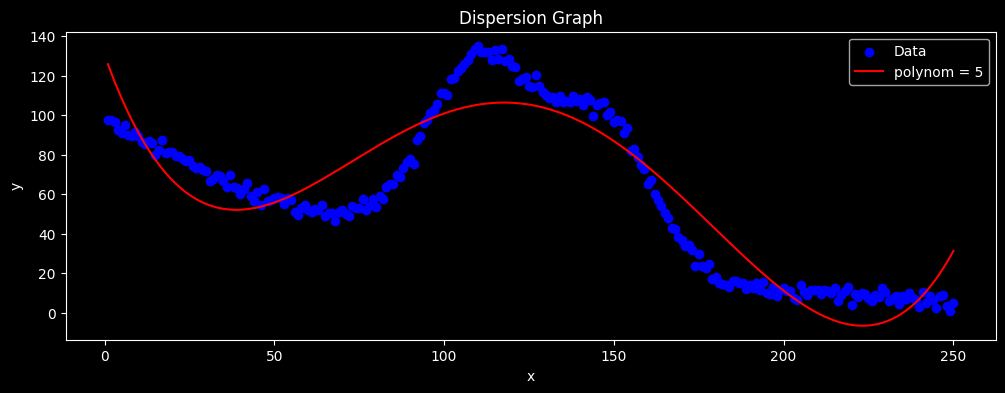

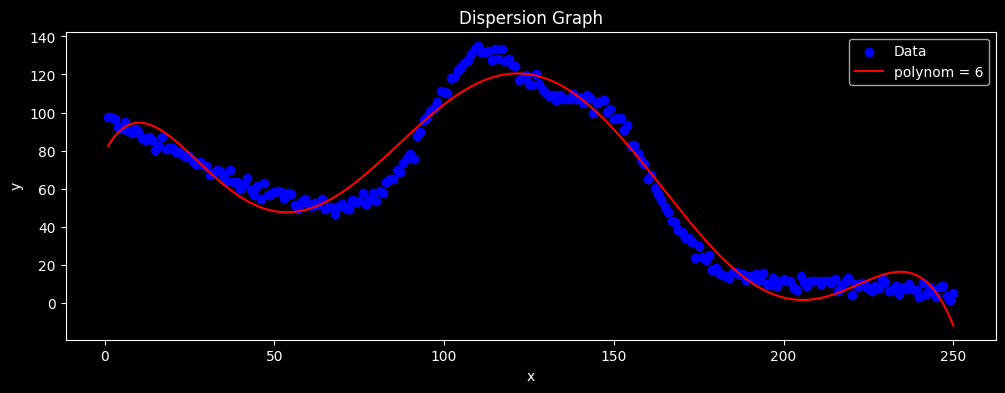

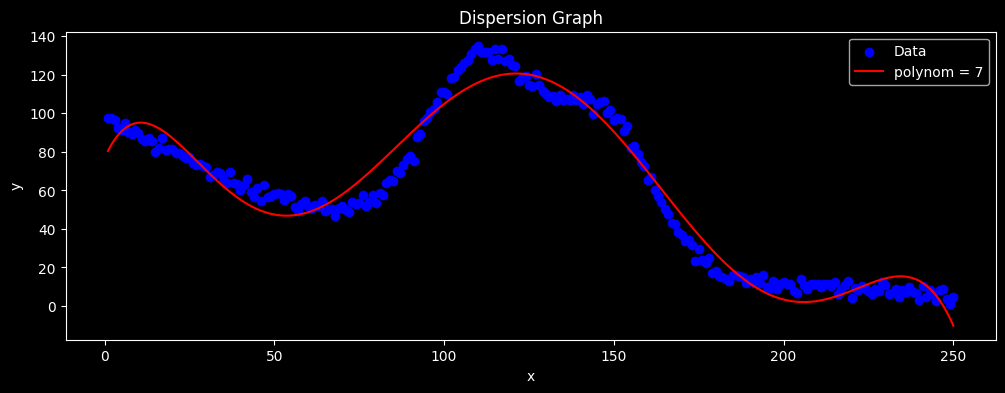

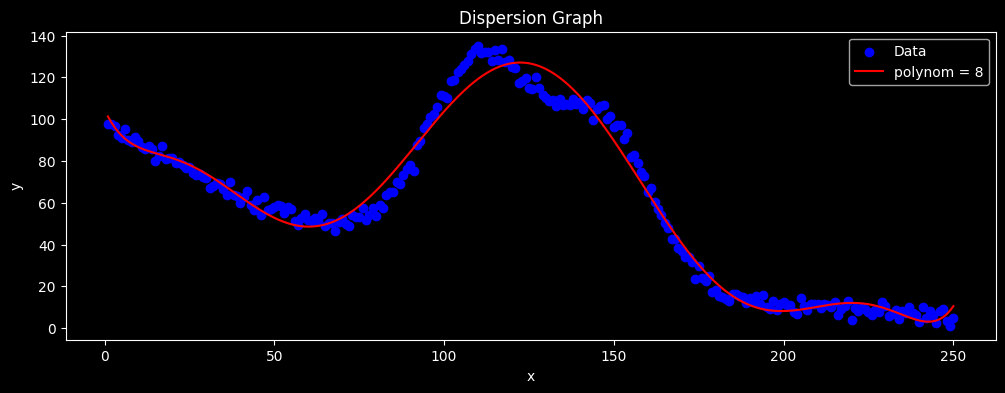

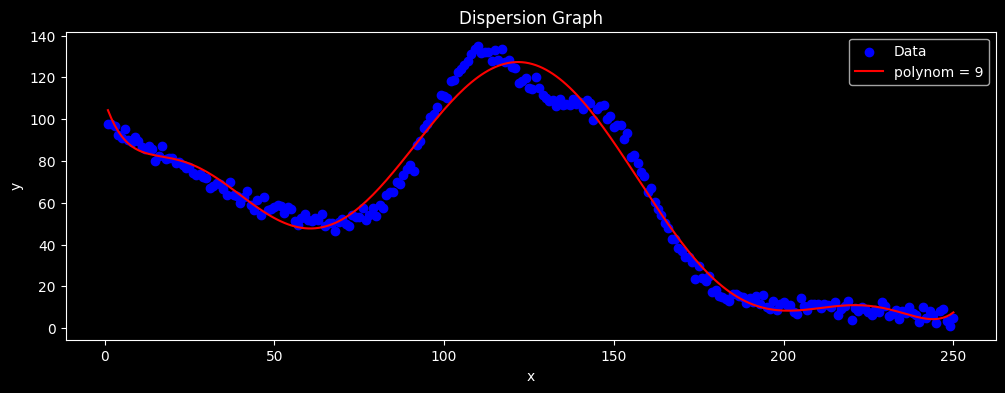

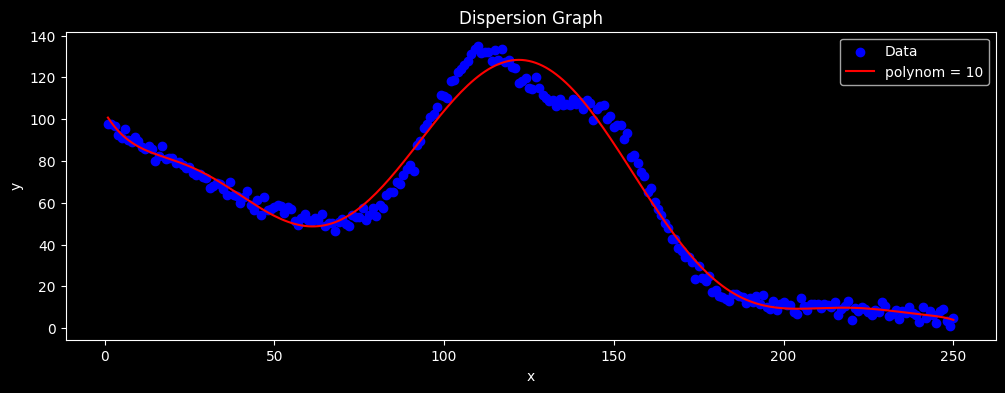

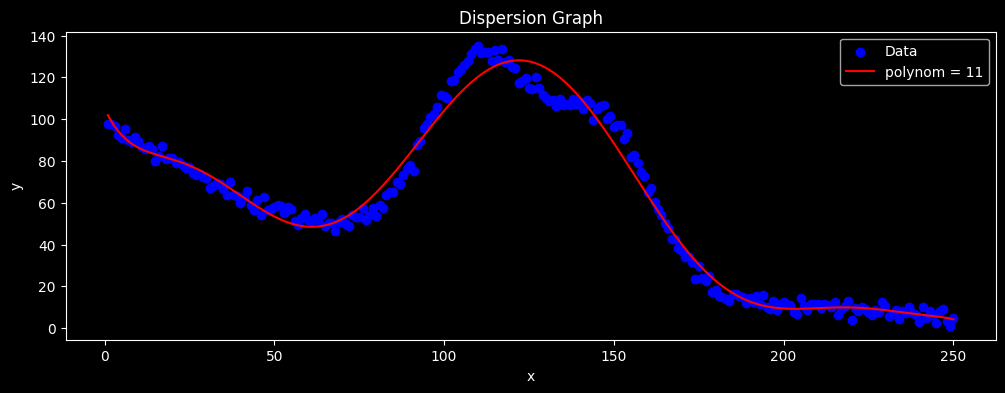

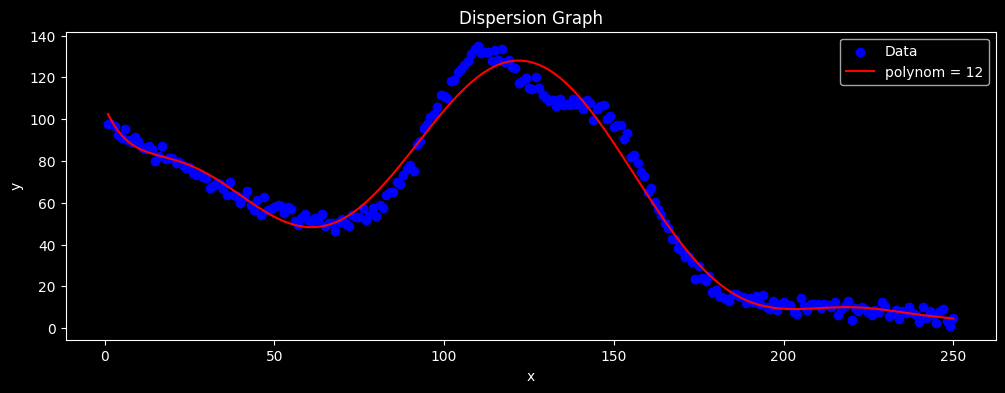

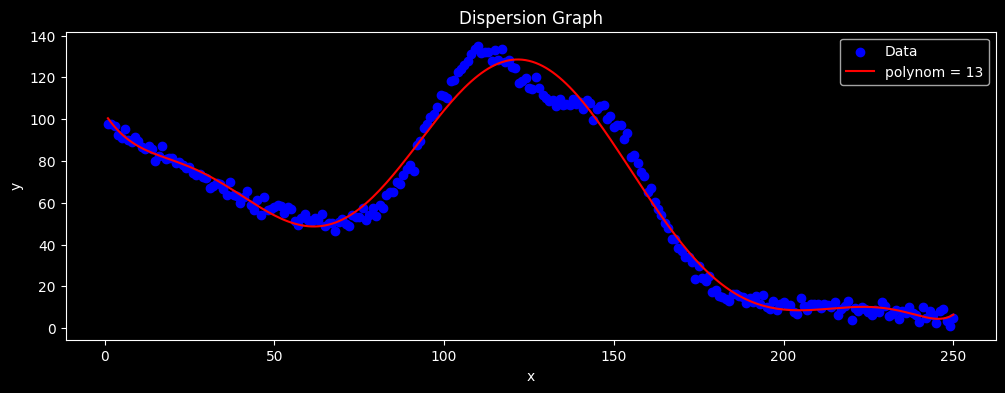

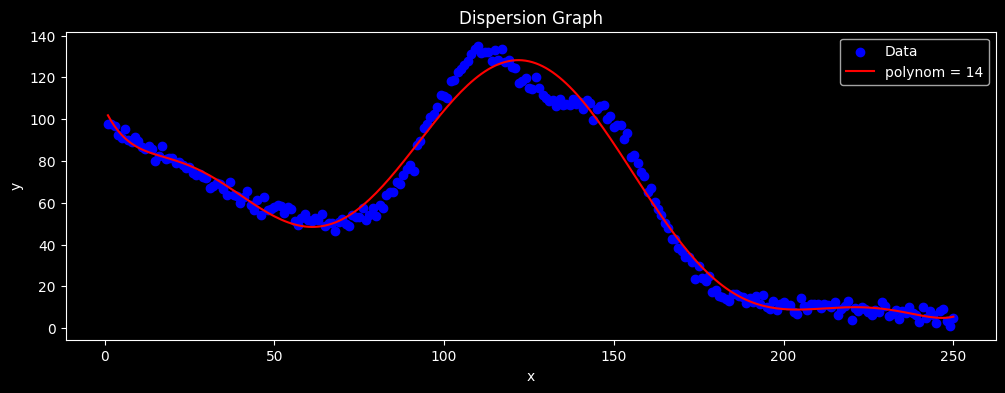

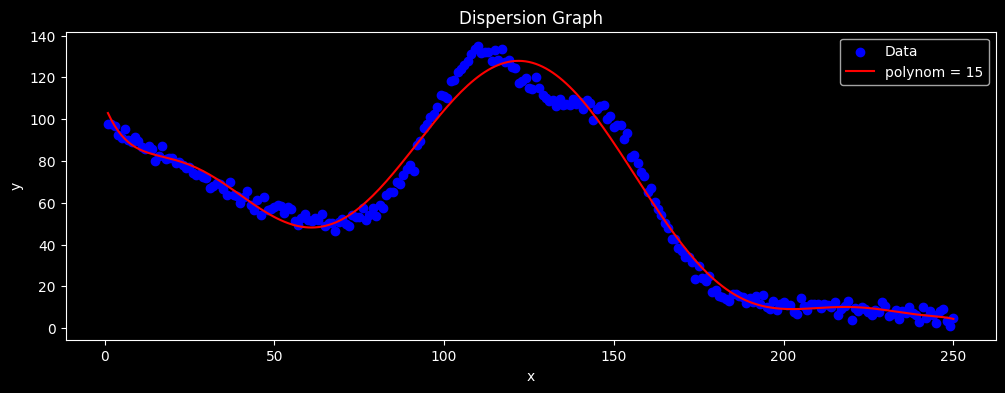

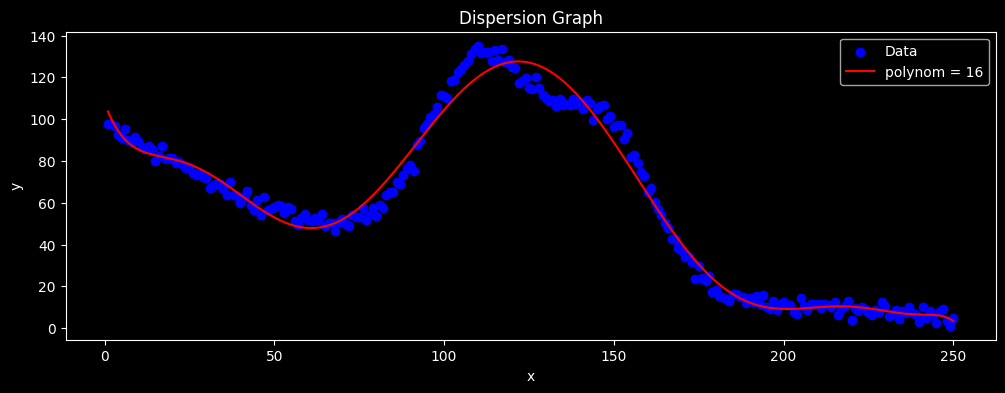

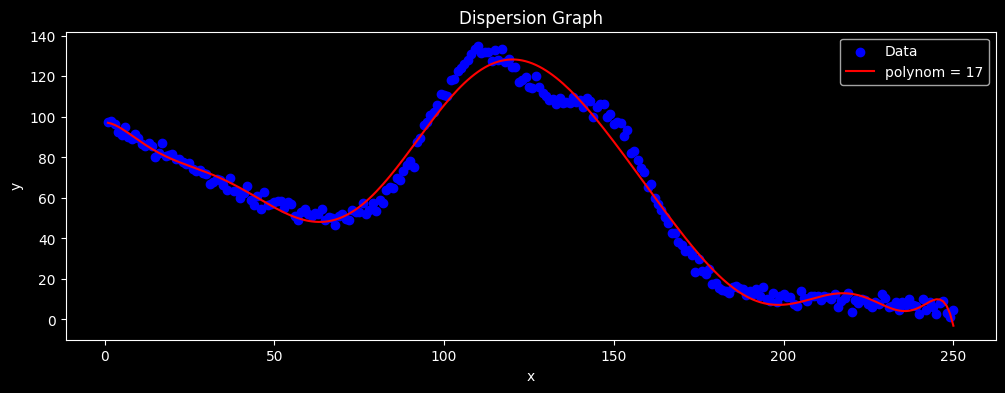

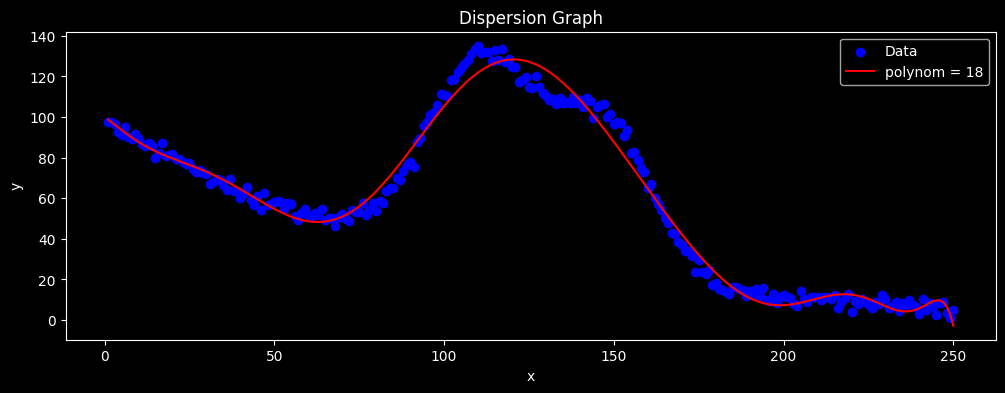

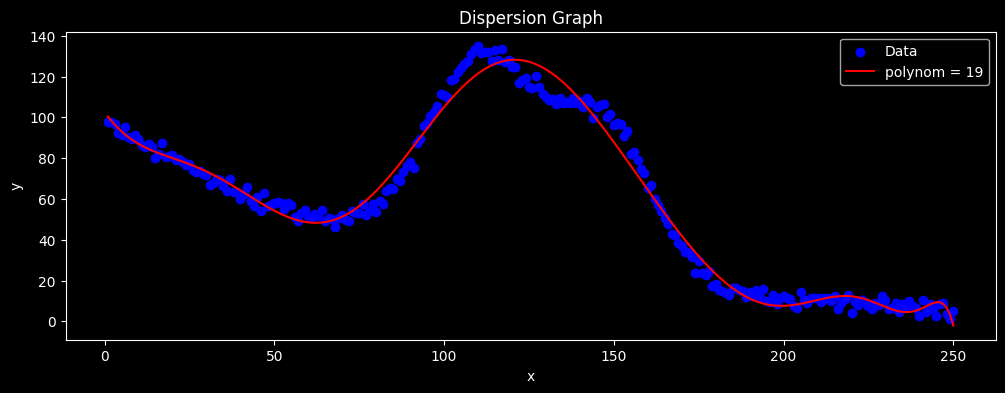

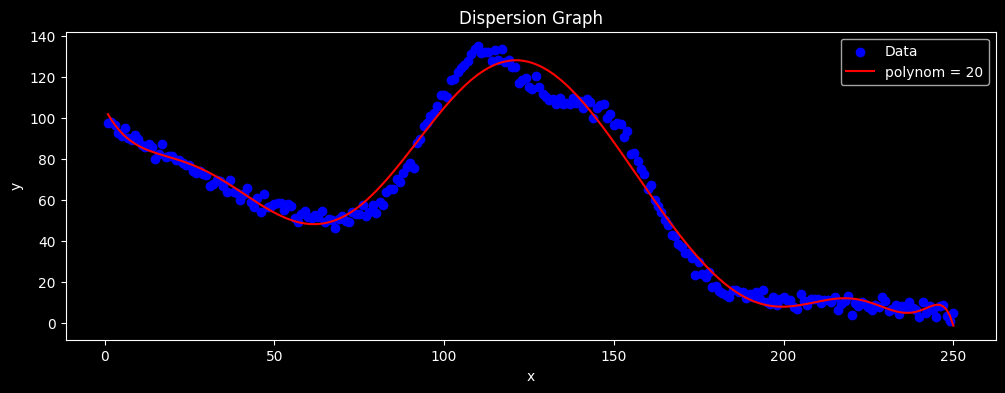

In [576]:
i = 0
for predictions in predictions_list:
    i += 1
    plt.figure(figsize=(12, 4))
    plt.scatter(X_gauss, y_gauss, label='Data', color='blue')
    plt.plot(X_gauss, predictions, label=f'polynom = {i}', color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Dispersion Graph')
    plt.legend()
    plt.show()

## c) RMSE

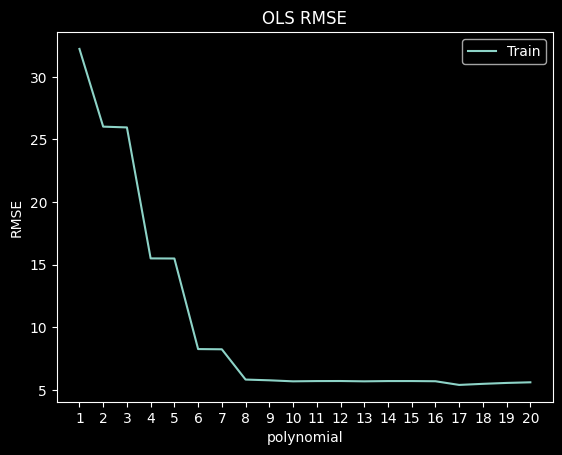

In [577]:
x_axis = range(1, len(rmse_train) + 1)
plt.plot(x_axis, rmse_train, label="Train")
plt.xlabel('polynomial')
plt.xticks(x_axis)
plt.ylabel('RMSE')
plt.title("OLS RMSE")
plt.legend()
plt.show()

## Best Polynomial degree

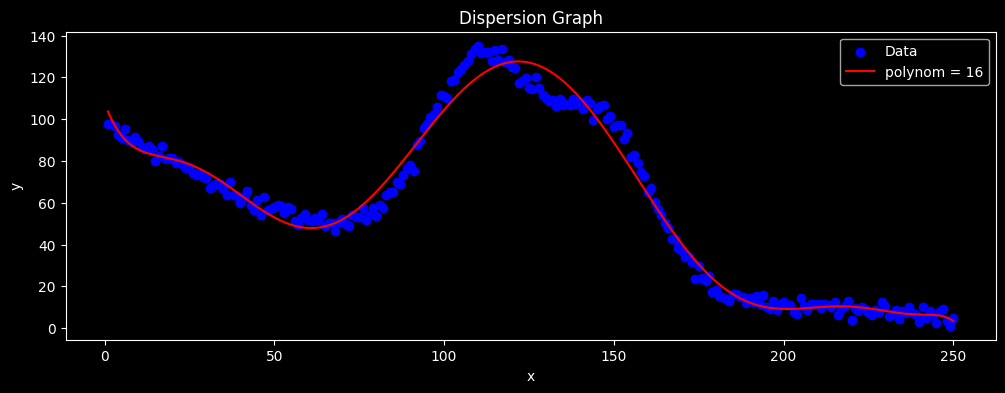

In [578]:
polynomial_data = pd.DataFrame()

for i in range(16):
    polynomial_data = pd.concat(
        [polynomial_data, X_gauss_norm ** (i + 1)], axis=1)

OLS = OrdinaryLeastSquares()
OLS.fit(polynomial_data, y_gauss_norm, target_max=y_max, target_min=y_min)
rmse_train.append(OLS.unormalized_rmse)

y_pred_norm = OLS.predict(polynomial_data)
y_pred = y_pred_norm * (y_max - y_min) + y_min

plt.figure(figsize=(12, 4))
plt.scatter(X_gauss, y_gauss, label='Data', color='blue')
plt.plot(X_gauss, y_pred, label=f'polynom = {i+1}', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dispersion Graph')
plt.legend()
plt.show()